<a href="https://colab.research.google.com/github/Ryansyaaw/PCVK_Ganjil_23/blob/main/week10.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [2]:
pip install pytesseract

In [3]:
import cv2 as cv
import numpy as np
import pytesseract
import matplotlib.pyplot as plt
import pandas as pd
from PIL import Image
from google.colab.patches import cv2_imshow

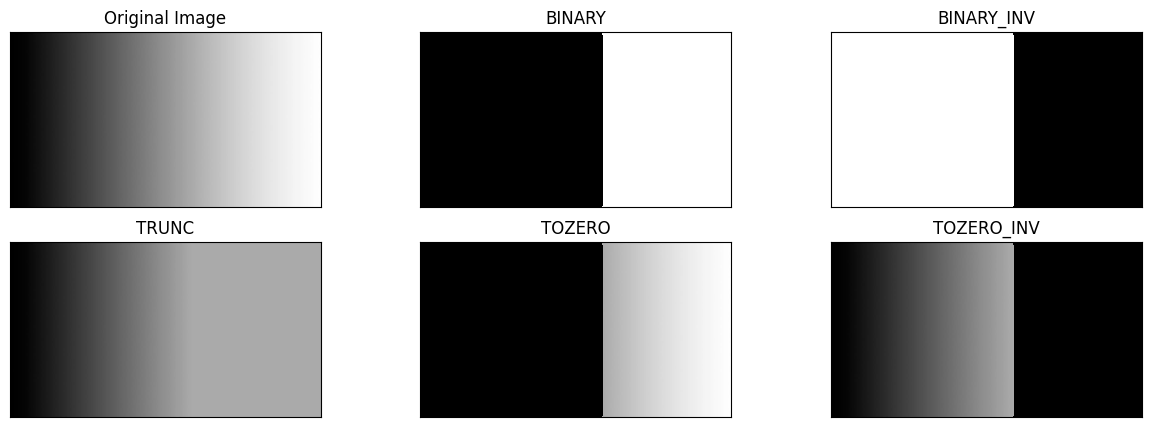

In [4]:
filename = ('/content/drive/MyDrive/Images/gradient.jpg')
img = cv.imread(filename)
thresh = 170 #nilai Threshold yang ditentukan
#1. thresh1 jika pixel di img>127, maka thresh1 bernilai 1(putih) selain itu bernilai 0(hitam)
ret,thresh1 = cv.threshold(img,thresh,255,cv.THRESH_BINARY)
#2. thresh2 adalah binary threshold inverse
ret,thresh2 = cv.threshold(img,thresh,255,cv.THRESH_BINARY_INV)
#3. Threshold Truncate
ret,thresh3 = cv.threshold(img,thresh,255,cv.THRESH_TRUNC)
#4. Threshold Tozero
ret,thresh4 = cv.threshold(img,thresh,255,cv.THRESH_TOZERO)
#5. Threshold Tozero Inverse
ret,thresh5 = cv.threshold(img,thresh,255,cv.THRESH_TOZERO_INV)
titles = ['Original Image','BINARY','BINARY_INV','TRUNC', 'TOZERO', 'TOZERO_INV']
images = [img, thresh1, thresh2, thresh3, thresh4, thresh5]
plt.figure(figsize = (15,5))
for i in range(len(images)):
  plt.subplot(2,3,i+1),plt.imshow(images[i],'gray', interpolation='nearest')
  plt.title(titles[i])
  plt.xticks([]),plt.yticks([])
plt.show()

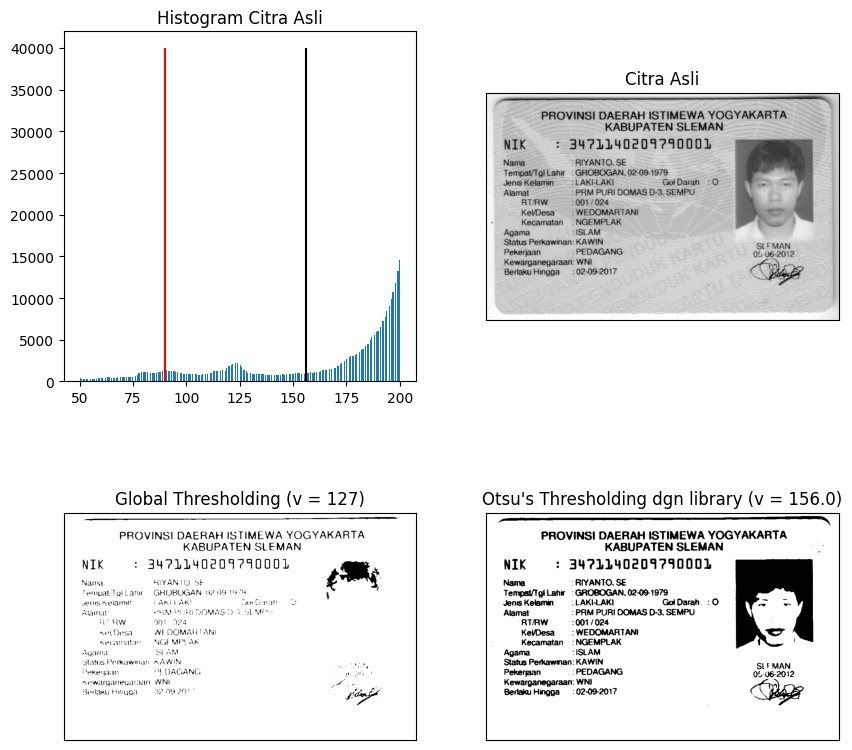

In [5]:
img2 = cv.imread('/content/drive/MyDrive/Images/ktp/ktp.png', 0)
blur = cv.GaussianBlur(img2, (5,5), 0)
thresh = 90

ret,th1 = cv.threshold(blur,thresh,255,cv.THRESH_BINARY)
ret2,th2 = cv.threshold(blur,0,255,cv.THRESH_BINARY+cv.THRESH_OTSU)
x = ("Otsu's Thresholding dgn library (v = ")+str(ret2)+")"
titles = ['Citra Asli', 'Global Thresholding (v = 127)', x]

citra3 = [blur, th1, th2]
plt.figure(figsize = (10,10))
plt.subplot(2,2,1),plt.hist(blur.ravel(),256,[50,200])
plt.vlines(ret,0,40000,colors='red') #garis vertikal merah menunjukan threshold global 127
plt.vlines(ret2,0,40000,colors='black') #garis vertikal hitam menunjukkan threshold 92 hasil otsu's
plt.title('Histogram Citra Asli')

for i in range(len(citra3)):
  plt.subplot(2,2,i+2),plt.imshow(citra3[i],'gray')
  plt.title(titles[i])
  plt.xticks([]),plt.yticks([])
plt.show()

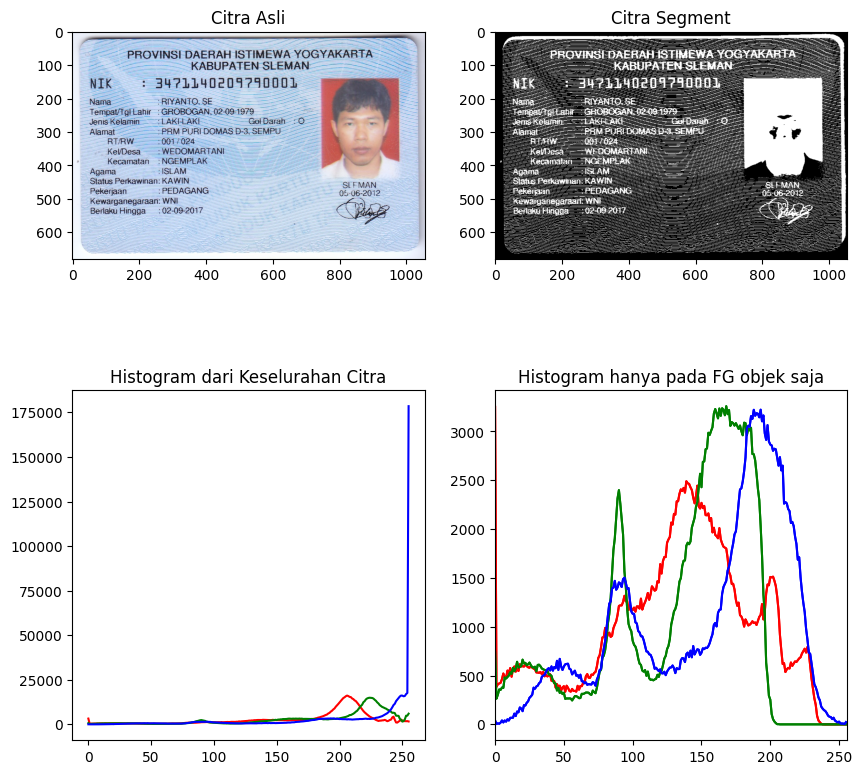

In [6]:
img3 = cv.imread('/content/drive/MyDrive/Images/ktp/ktp.png')
img_rgb = cv.cvtColor(img3, cv.COLOR_BGR2RGB)
img_gray = cv.cvtColor(img_rgb, cv.COLOR_BGR2GRAY)

ret3, mask = cv.threshold(img_gray, 200, 255, cv.THRESH_BINARY_INV)

plt.figure(figsize = (10,10))
plt.subplot(2, 2, 1), plt.imshow(img_rgb)
plt.title('Citra Asli')
plt.subplot(2,2,2),plt.imshow(mask, 'gray')
plt.title('Citra Segment')
color = ('r', 'g', 'b')

for i, col in enumerate(color):
  hist0 = cv.calcHist([img_rgb], [i], None, [256], [0,256])
  plt.subplot(2, 2, 3), plt.plot(hist0, color = col)
  plt.title('Histogram dari Keselurahan Citra')
  hist1 = cv.calcHist([img_rgb],[i],mask,[256],[0,256])
  plt.subplot(2,2,4),plt.plot(hist1,color = col)
  plt.title('Histogram dari keseluruhan citra')
  hist1 = cv.calcHist([img_rgb],[i],mask,[256],[0,256])
  plt.subplot(2,2,4),plt.plot(hist1,color = col)
  plt.title('Histogram hanya pada FG objek saja')
  plt.xlim([0,256])

plt.show()

(<Axes: >, <matplotlib.image.AxesImage at 0x7d50d039f370>)

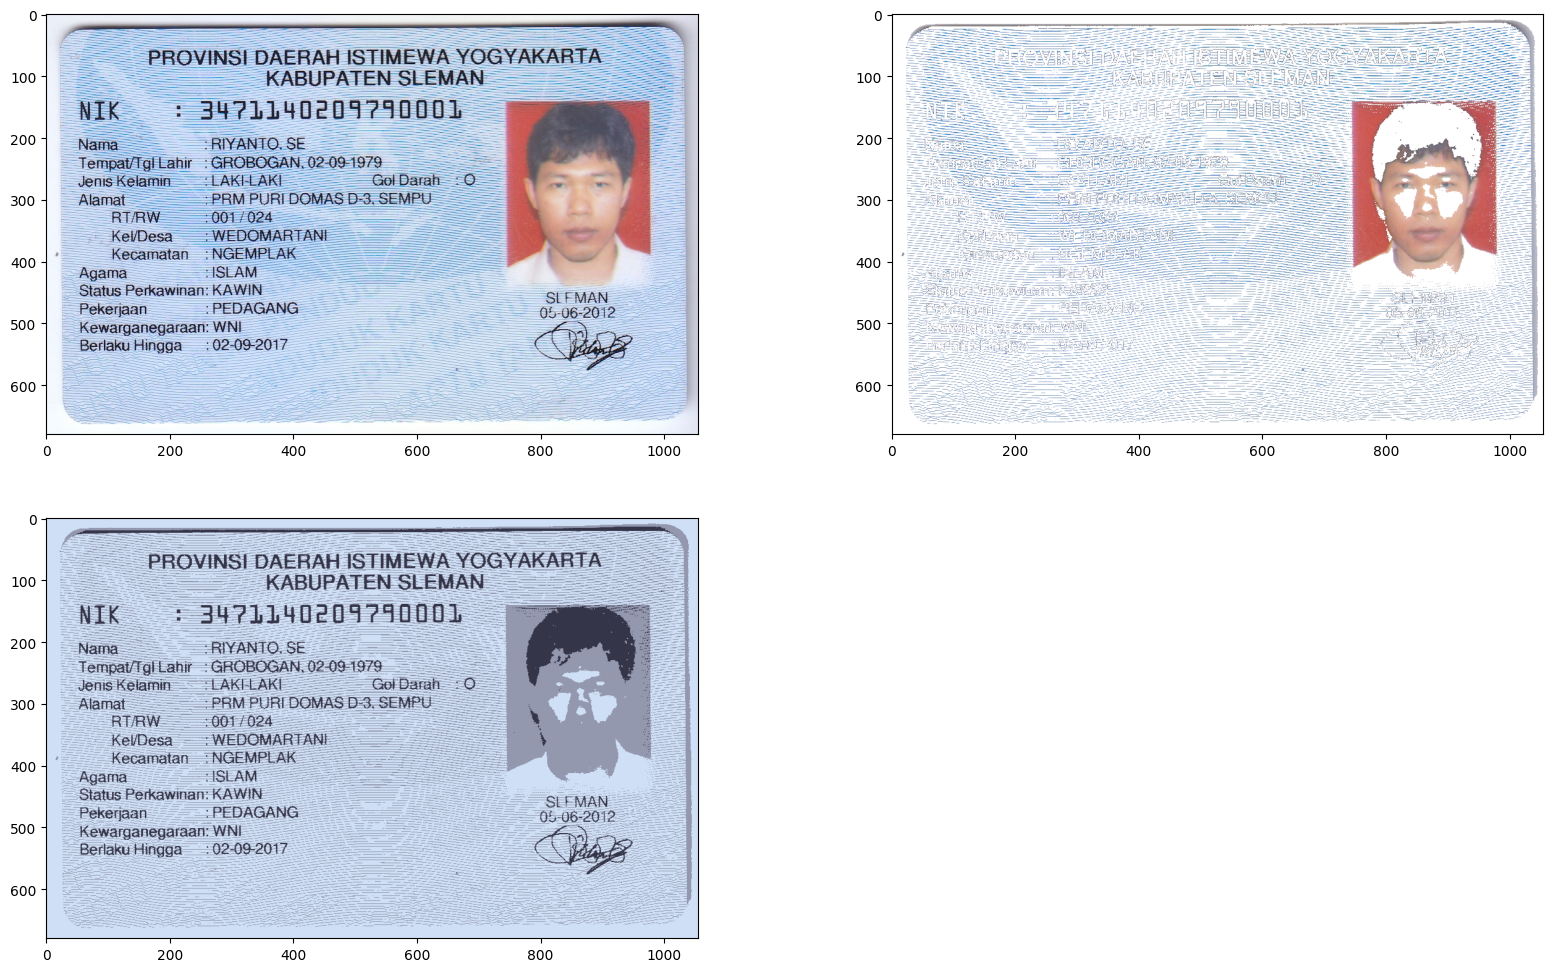

In [7]:
# Kmeans Image Segmentation
img = cv.imread('/content/drive/MyDrive/Images/ktp/ktp.png')
img = cv.cvtColor(img, cv.COLOR_BGR2RGB)

# reshape array ke bentuk 2D
pixel_val = img.reshape((-1, 3))
# convert to float
pixel_val = np.float32(pixel_val)

criteria = (cv.TERM_CRITERIA_EPS + cv.TERM_CRITERIA_MAX_ITER, 100, 0.2)

k = 3
_, labels, (centers) = cv.kmeans(pixel_val, k, None, criteria, 10, cv.KMEANS_RANDOM_CENTERS)
# Konversi titik centroid ke dalam Integer
centers = np.uint8(centers)
# flattening label array
labels = labels.flatten()
# konversi warna pixel asli ke warna dari tiap centroidnya
segmented_img = centers[labels.flatten()]
segmented_img = segmented_img.reshape(img.shape)

masked_img = np.copy(img)
masked_img = masked_img.reshape((-1, 3))
# cluster = 2
masked_img[labels != 2] = [255, 255, 255]
masked_img = masked_img.reshape(img.shape)

plt.figure(figsize = (20, 12))
plt.subplot(2, 2, 1), plt.imshow(img)
plt.subplot(2, 2, 2), plt.imshow(masked_img)
plt.subplot(2, 2, 3), plt.imshow(segmented_img)

In [8]:
!sudo apt-get install tesseract-ocr-ind

Reading package lists... Done
Building dependency tree... Done
Reading state information... Done
The following additional packages will be installed:
  tesseract-ocr tesseract-ocr-eng tesseract-ocr-osd
The following NEW packages will be installed:
  tesseract-ocr tesseract-ocr-eng tesseract-ocr-ind tesseract-ocr-osd
0 upgraded, 4 newly installed, 0 to remove and 19 not upgraded.
Need to get 5,353 kB of archives.
After this operation, 16.8 MB of additional disk space will be used.
Get:1 http://archive.ubuntu.com/ubuntu jammy/universe amd64 tesseract-ocr-eng all 1:4.00~git30-7274cfa-1.1 [1,591 kB]
Get:2 http://archive.ubuntu.com/ubuntu jammy/universe amd64 tesseract-ocr-osd all 1:4.00~git30-7274cfa-1.1 [2,990 kB]
Get:3 http://archive.ubuntu.com/ubuntu jammy/universe amd64 tesseract-ocr amd64 4.1.1-2.1build1 [236 kB]
Get:4 http://archive.ubuntu.com/ubuntu jammy/universe amd64 tesseract-ocr-ind all 1:4.00~git30-7274cfa-1.1 [537 kB]
Fetched 5,353 kB in 0s (29.6 MB/s)
debconf: unable to init

In [9]:
def display(img,cmap='gray'):
  fig = plt.figure(figsize=(12,10))
  ax = fig.add_subplot(111)
  ax.imshow(img,cmap='gray')

In [10]:
from pytesseract import Output
img = cv.imread('/content/drive/MyDrive/Images/ktp/ktp.png')
d = pytesseract.image_to_data(img, output_type=Output.DICT)
print(d.keys())

dict_keys(['level', 'page_num', 'block_num', 'par_num', 'line_num', 'word_num', 'left', 'top', 'width', 'height', 'conf', 'text'])


em

PROVINSI DAERAH ISTIMEWA YOGYAKARTA
KABUPATEN SLEMAN

 

NIK : 34711140209790001

Nama :RIYANTO. SE

Tempat/Tgl Lahir : GROBOGAN. 02-09-1979

Jenis Kelamin : LAKI-LAKI Gol Darah : 0

Alamat PRM PURI DOMAS D-3. SEMPU
RTRW 1001 1024

Kel/Desa : WEDOMARTANI!
Kecamatan : NGEMPLAK

Agama "ISLAM
Status Bean KAWIN SLEMAN
Pekerjaan : PEDAGANG 05-06-2012

Kewarganegaraan: WNI HI —
Berlaku Hingga :02-09-2017 NIA

   
 

 



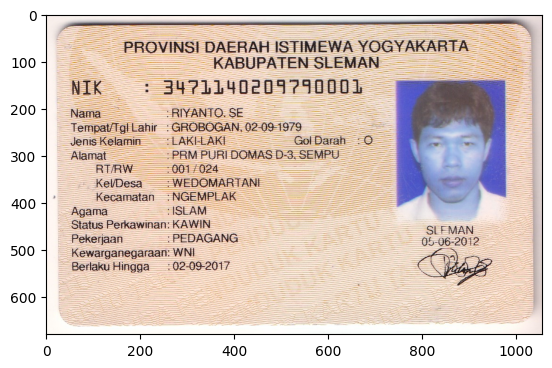

In [11]:
img = cv.imread('/content/drive/MyDrive/Images/ktp/ktp.png')
plt.imshow(img)
gray = cv.cvtColor(img, cv.COLOR_BGR2GRAY)
th, threshed = cv.threshold(gray, 127, 255, cv.THRESH_TRUNC)
text1 = pytesseract.image_to_data(threshed,output_type='data.frame')
text2 = pytesseract.image_to_string(threshed, lang="ind")
print(text2)
text = text1[text1.conf != -1]
lines = text.groupby('block_num')['text'].apply(list)
conf = text.groupby(['block_num'])['conf'].mean()

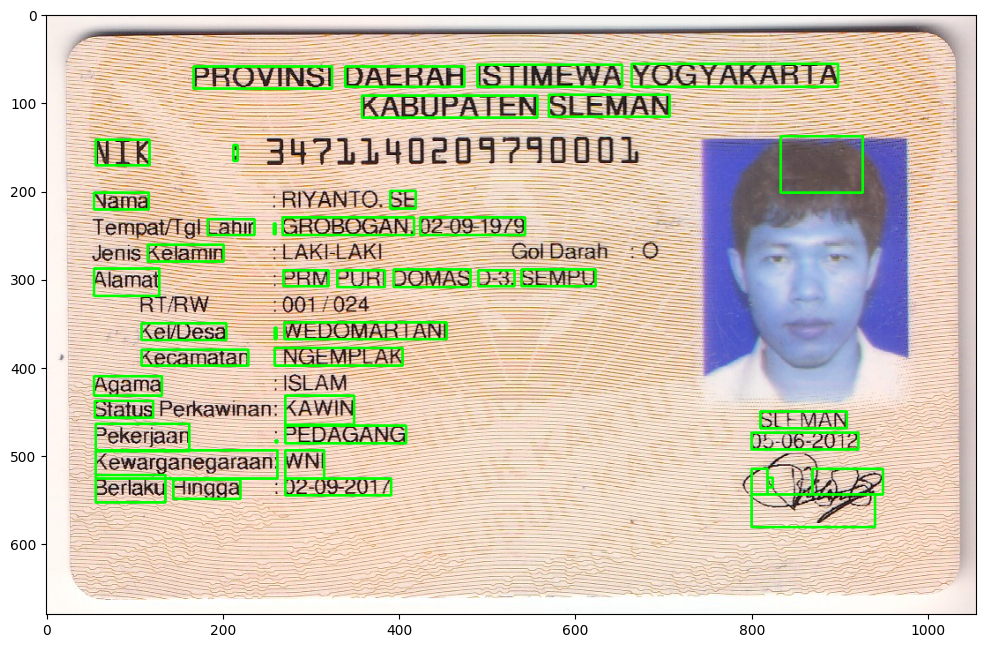

In [12]:
# Menambahkan variabel text1
# text1 = pytesseract.image_to_data(threshed,output_type='data.frame')
n_boxes = len(text1['text'])
for i in range(n_boxes):
  if int(text1['conf'][i]) > 60:
    (x, y, w, h) = (text1['left'][i], text1['top'][i], text1['width'][i], text1['height'][i])
    img = cv.rectangle(img, (x, y), (x + w, y + h), (0, 255, 0), 2)
display(img)

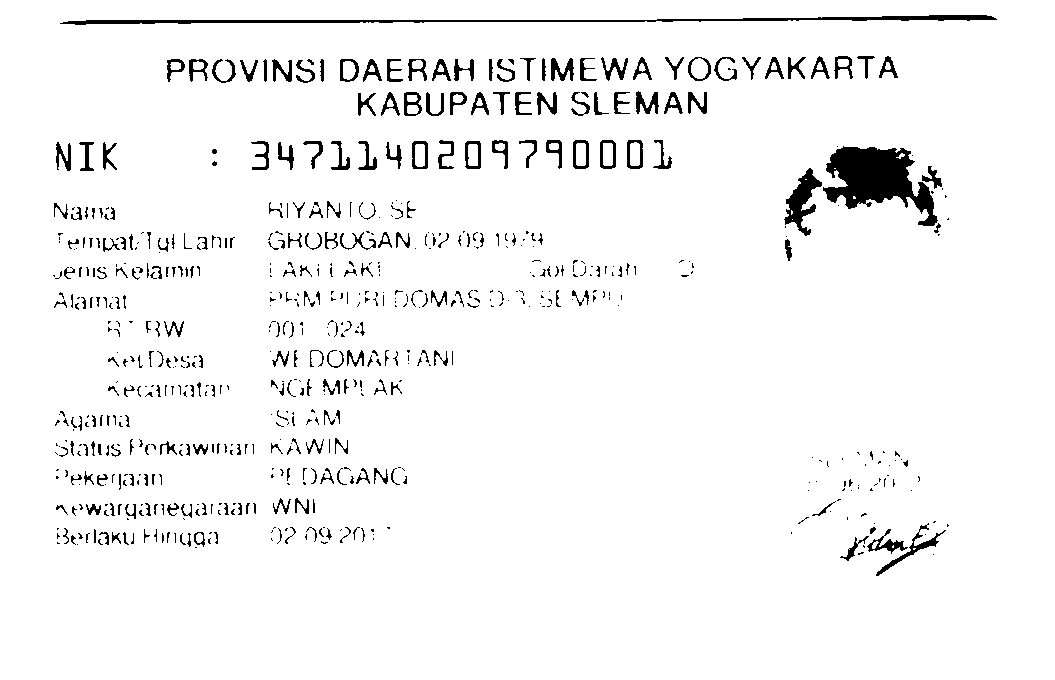

In [17]:
import cv2 as cv
from google.colab.patches import cv2_imshow
import numpy as np
import matplotlib.pyplot as plt
cv2_imshow(citra3[1])

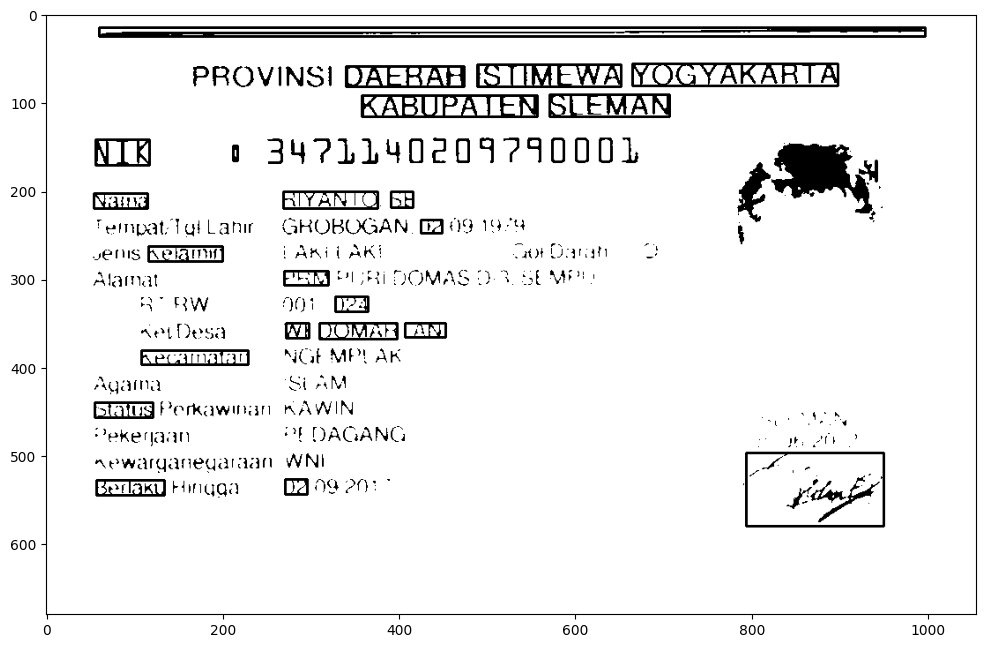

In [19]:
n_boxes = len(text1['text'])
for i in range(n_boxes):
  if int(text1['conf'][i]) > 60:
    (x, y, w, h) = (text1['left'][i], text1['top'][i], text1['width'][i], text1['height'][i])
    citra3[1] = cv.rectangle(citra3[1], (x, y), (x + w, y + h), (0, 255, 0), 2)
display(citra3[1])

In [18]:
th, threshed = cv.threshold(citra3[1], 127, 255, cv.THRESH_TRUNC)
text1 = pytesseract.image_to_data(threshed,output_type='data.frame')
text2 = pytesseract.image_to_string(threshed, lang="ind")
print(text2)
text = text1[text1.conf != -1]
lines = text.groupby('block_num')['text'].apply(list)
conf = text.groupby(['block_num'])['conf'].mean()

 

PROVINSI DAERAH ISTIMEWA YOGYAKARTA
KABUPATEN SLEMAN

NIK : 34?)24020979D001
Naina HIYANIO. SE Ik
, :

Tempat/Tut Lahir GROBOGAN. tip A9 10

 

yeris Kelamm LAKI LAKI Got Darah :
Alamat PBM BRI DOMAS D3. SE MP3
RR RW A01 9P3
set Desa Wt DOMAR TANI
Kecamatan NGEMPLAK
Agama SI AM
status Perkawman KAWIN Tn
Pekerjaan 2 DAGANG 1 " Sa

kewarganeyaraan WNI
Berlaku Hingga IPA

 

